# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pd.__version__

'0.23.4'

In [3]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [4]:
resource_name='cnss_2017'

In [5]:
pkg.resource(resource_name)

Header,Type,Description
caseid,integer,Case identification number (assigned by SRI)
survid,integer,Case identification number (assigned by SRI)
timezone,string,Time zone (provided by MSG)
state,string,State (provided by MSG)
msa,string,Metropolitan Statistical Area (provided by MSG)
msc,integer,Metropolitan Status Code (provided by MSG)
censusr,integer,Census Region (provided by MSG)
censusd,integer,Census Division (provided by MSG)
cbsamsa,integer,CBSA MSA Met Status Code (provided by MSG)
cbsamcsa,integer,CBSA MCSA Met Status Code (provided by MSG)


In [6]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [7]:
df.head()

,caseid,survid,timezone,state,msa,msc,censusr,censusd,cbsamsa,cbsamcsa,...,race_e,numraces,relig,church,hhince,hhinc50k,hhincu,hhinco,hhinc,gender
0,80007,80007,C,TX,2920.0,1,3,7,3,5,...,No,1.0,No religion / Atheist / Agnostic,A few times a year,NaN,"$50,000 or over",NaN,"$150,000 or more","$150,000 or more",Male
1,80027,80027,C,AL,NaN,5,3,6,5,1,...,No,1.0,Protestant,A few times a year,NaN,"$50,000 or over",NaN,"50 to under $75,000","50 to under $75,000",Female
2,80029,80029,C,LA,5560.0,3,3,7,3,5,...,No,1.0,Catholic,A few times a year,196000.0,NaN,NaN,NaN,"$150,000 or more",Male
3,80037,80037,C,IN,NaN,5,2,3,5,1,...,No,1.0,No religion / Atheist / Agnostic,Never,75000.0,NaN,NaN,NaN,"75 to under $100,000",Male
4,80041,80041,C,MO,3760.0,1,2,4,1,5,...,No,1.0,No religion / Atheist / Agnostic,Never,60000.0,NaN,NaN,NaN,"50 to under $75,000",Female


In [8]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [9]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,2
datetime,0
number,16
other,95


# Constant Columns

In [10]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

,0,1,4,36
rvq3,Answer,Answer,NaN,NaN
rvq5,NaN,Answer,Answer,NaN


# Empty Columns

In [11]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [12]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

# Number Columns

In [13]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
caseid      1000 non-null int64
survid      1000 non-null int64
msa         830 non-null float64
msc         1000 non-null int64
censusr     1000 non-null int64
censusd     1000 non-null int64
cbsamsa     1000 non-null int64
cbsamcsa    1000 non-null int64
hhsize_a    999 non-null float64
hhsize_b    999 non-null float64
hhsize_c    998 non-null float64
hhadults    999 non-null float64
ph_totl     998 non-null float64
yob         1000 non-null int64
age         1000 non-null int64
numraces    991 non-null float64
dtypes: float64(7), int64(9)
memory usage: 125.1 KB


None

,count,mean,std,min,25%,50%,75%,max
caseid,1000.0,67918.285000,31335.857247,10011.0,80093.5,83635.0,86935.5,90998.0
survid,1000.0,67918.285000,31335.857247,10011.0,80093.5,83635.0,86935.5,90998.0
msa,830.0,4446.293976,2542.086945,80.0,1960.0,4920.0,6280.0,9320.0
msc,1000.0,2.196000,1.553060,1.0,1.0,1.0,3.0,5.0
censusr,1000.0,2.590000,1.005441,1.0,2.0,3.0,3.0,4.0
censusd,1000.0,5.048000,2.473017,1.0,3.0,5.0,7.0,9.0
cbsamsa,1000.0,1.880000,1.429561,1.0,1.0,1.0,3.0,5.0
cbsamcsa,1000.0,4.636000,1.147528,1.0,5.0,5.0,5.0,5.0
hhsize_a,999.0,0.468468,0.760206,0.0,0.0,0.0,1.0,3.0
hhsize_b,999.0,1.866867,1.329974,0.0,1.0,2.0,2.0,10.0


## Distributions

In [14]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


/Users/eric/proj/virt/data-project/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


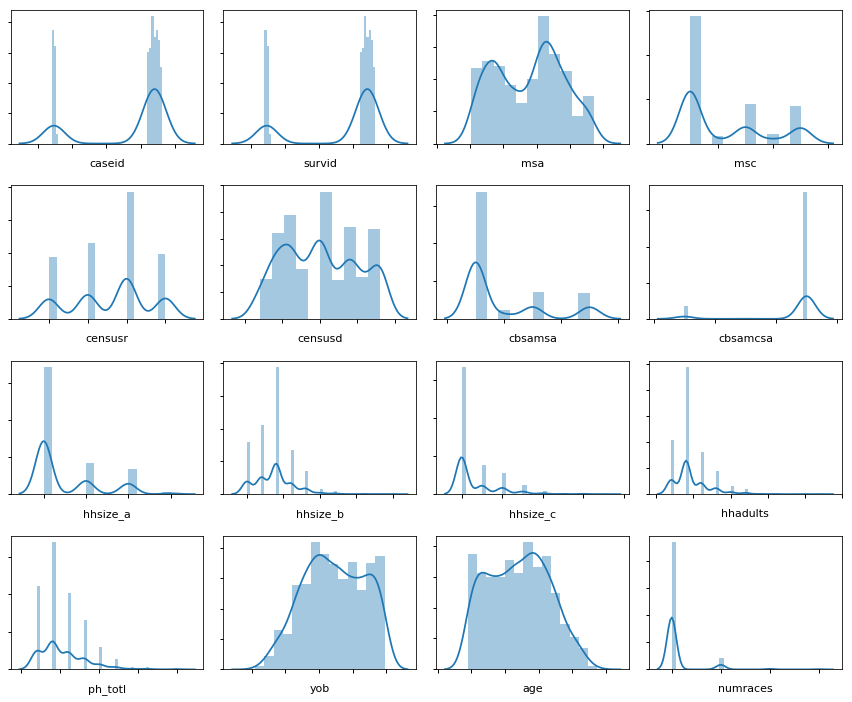

In [15]:
plot_histograms(df[number_col_names])

## Box Plots

In [16]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

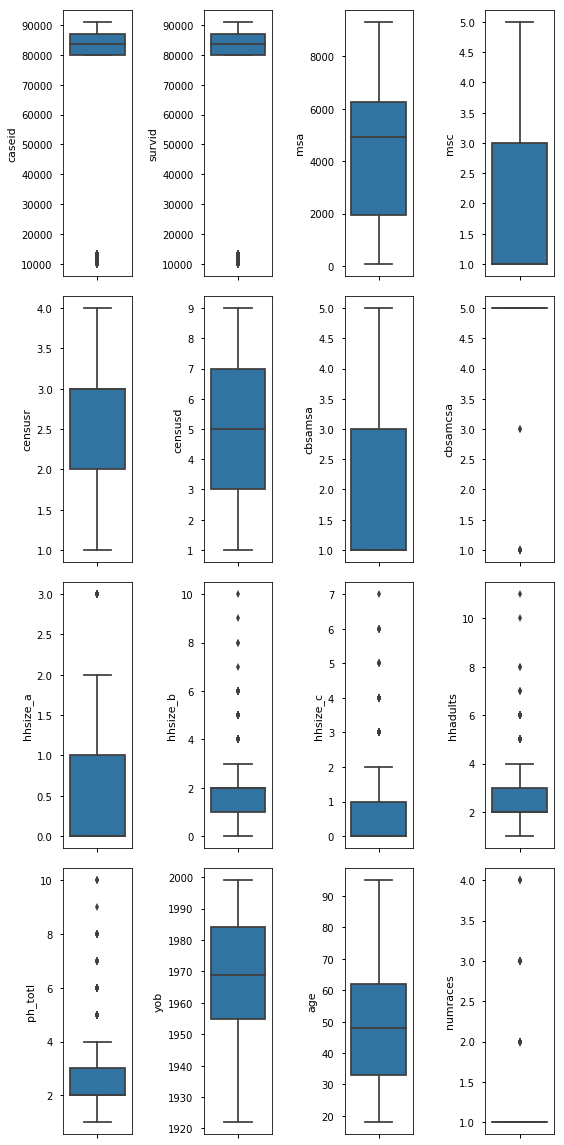

In [17]:
  
plot_boxes(df[number_col_names])

In [18]:
## Correlations

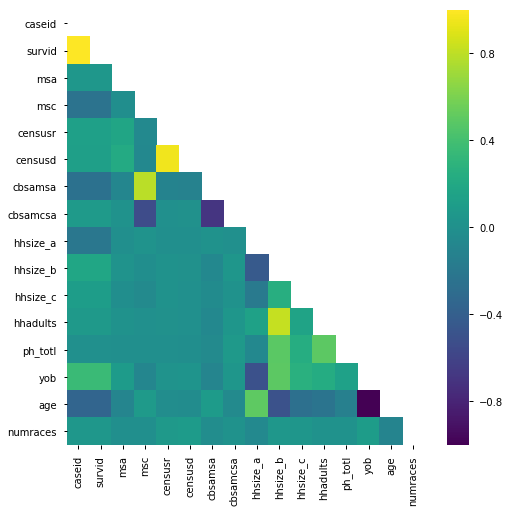

In [19]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [20]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 95 columns):
timezone      1000 non-null object
state         1000 non-null object
ahq1          1000 non-null object
ahq2          998 non-null object
ahq3          999 non-null object
kenq1         998 non-null object
kenq2         996 non-null object
kenq3         997 non-null object
js_version    1000 non-null object
jsq1          989 non-null object
lcq1          983 non-null object
skq1          1000 non-null object
skq2_a        1000 non-null object
skq2_b        1000 non-null object
skq3          987 non-null object
jbq1          998 non-null object
jbq2          999 non-null object
jbq3          450 non-null object
rvq1          999 non-null object
rvq2          999 non-null object
rvq4          998 non-null object
rvq6          356 non-null object
jaq1          998 non-null object
rq_seq_i      1000 non-null object
jaq2_rq       995 non-null object
jaq3_rq       993 non-null object
pd

None

,count,unique,top,freq
timezone,1000,4,E,473
state,1000,48,CA,98
ahq1,1000,5,Strongly agree,462
ahq2,998,5,Somewhat agree,258
ahq3,999,5,Strongly agree,450
kenq1,998,5,Strongly disagree,311
kenq2,996,5,Strongly disagree,265
kenq3,997,5,Strongly agree,332
js_version,1000,2,Provided no notice,511
jsq1,989,4,Some of the time,615


# Nulls


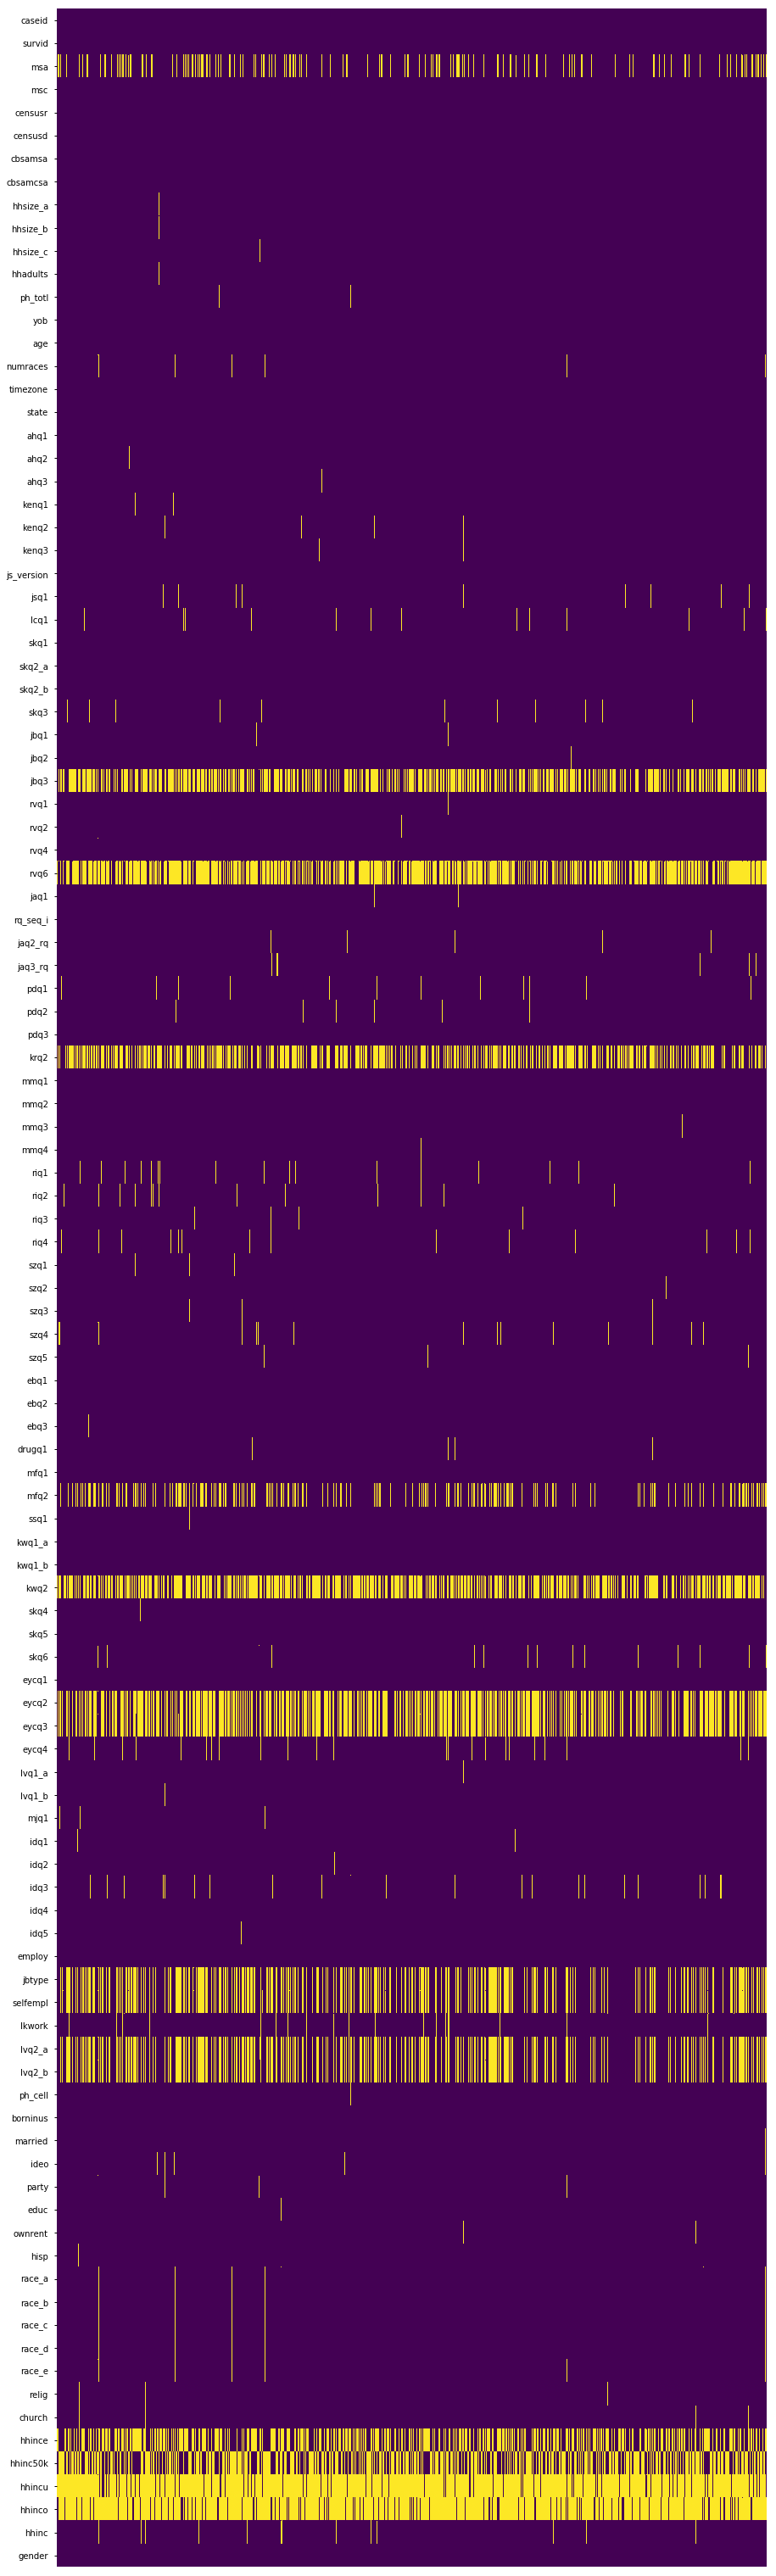

In [21]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )